## Multi-model mean example

In [1]:
from esmvalcore.dataset import Dataset

In [2]:
# Declare common dataset facets
template = Dataset(
    short_name='pr',
    mip='Amon',
    project='ZV30',
    exp= 'piControl',
    dataset='ACCESS-CM2',
    ensemble='*',
    grid='gn',
    institute="CSIRO-ARCCSS"
)

# Substitute data sources and experiments
datasets = []
for ensemble_id in [f"r3i1p{physics}f1" for physics in range(1, 20)]:
    dataset = template.copy(ensemble=ensemble_id)
    dataset.augment_facets()
    datasets.append(dataset)

In [3]:
cubes = [dataset.load() for dataset in datasets]

In [7]:
from esmvalcore.preprocessor import multi_model_statistics
from esmvalcore.preprocessor import climate_statistics
from esmvalcore.preprocessor import convert_units
from esmvalcore.preprocessor import area_statistics

In [5]:
cubes = [climate_statistics(cube, seasons="DJF", operator="mean") for cube in cubes]
cube = multi_model_statistics(cubes, statistics=["mean"], span="overlap")["mean"]
cube = convert_units(cube, units="mm/yr")

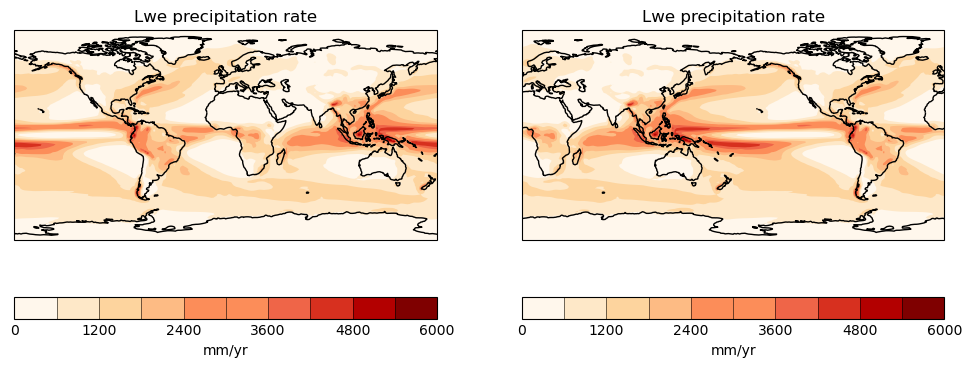

In [6]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import colormaps

import iris
import iris.plot as iplt
import iris.quickplot as qplt

# Load a Cynthia Brewer palette.
brewer_cmap = colormaps["brewer_OrRd_09"]

# Create a figure
plt.figure(figsize=(12, 5))

# Plot #1: countourf with axes longitude from -180 to 180
proj = ccrs.PlateCarree(central_longitude=0.0)
plt.subplot(121, projection=proj)
qplt.contourf(cube, brewer_cmap.N, cmap=brewer_cmap)
plt.gca().coastlines()

# Plot #2: contourf with axes longitude from 0 to 360
proj = ccrs.PlateCarree(central_longitude=-180.0)
plt.subplot(122, projection=proj)
qplt.contourf(cube, brewer_cmap.N, cmap=brewer_cmap)
plt.gca().coastlines()
iplt.show()